In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [ ]:
df = pd.read_csv('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df = df.drop('No', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


We see that all columns are non-null and all of them are int64 or float64. So, we do not need to work with data types and cut nulls

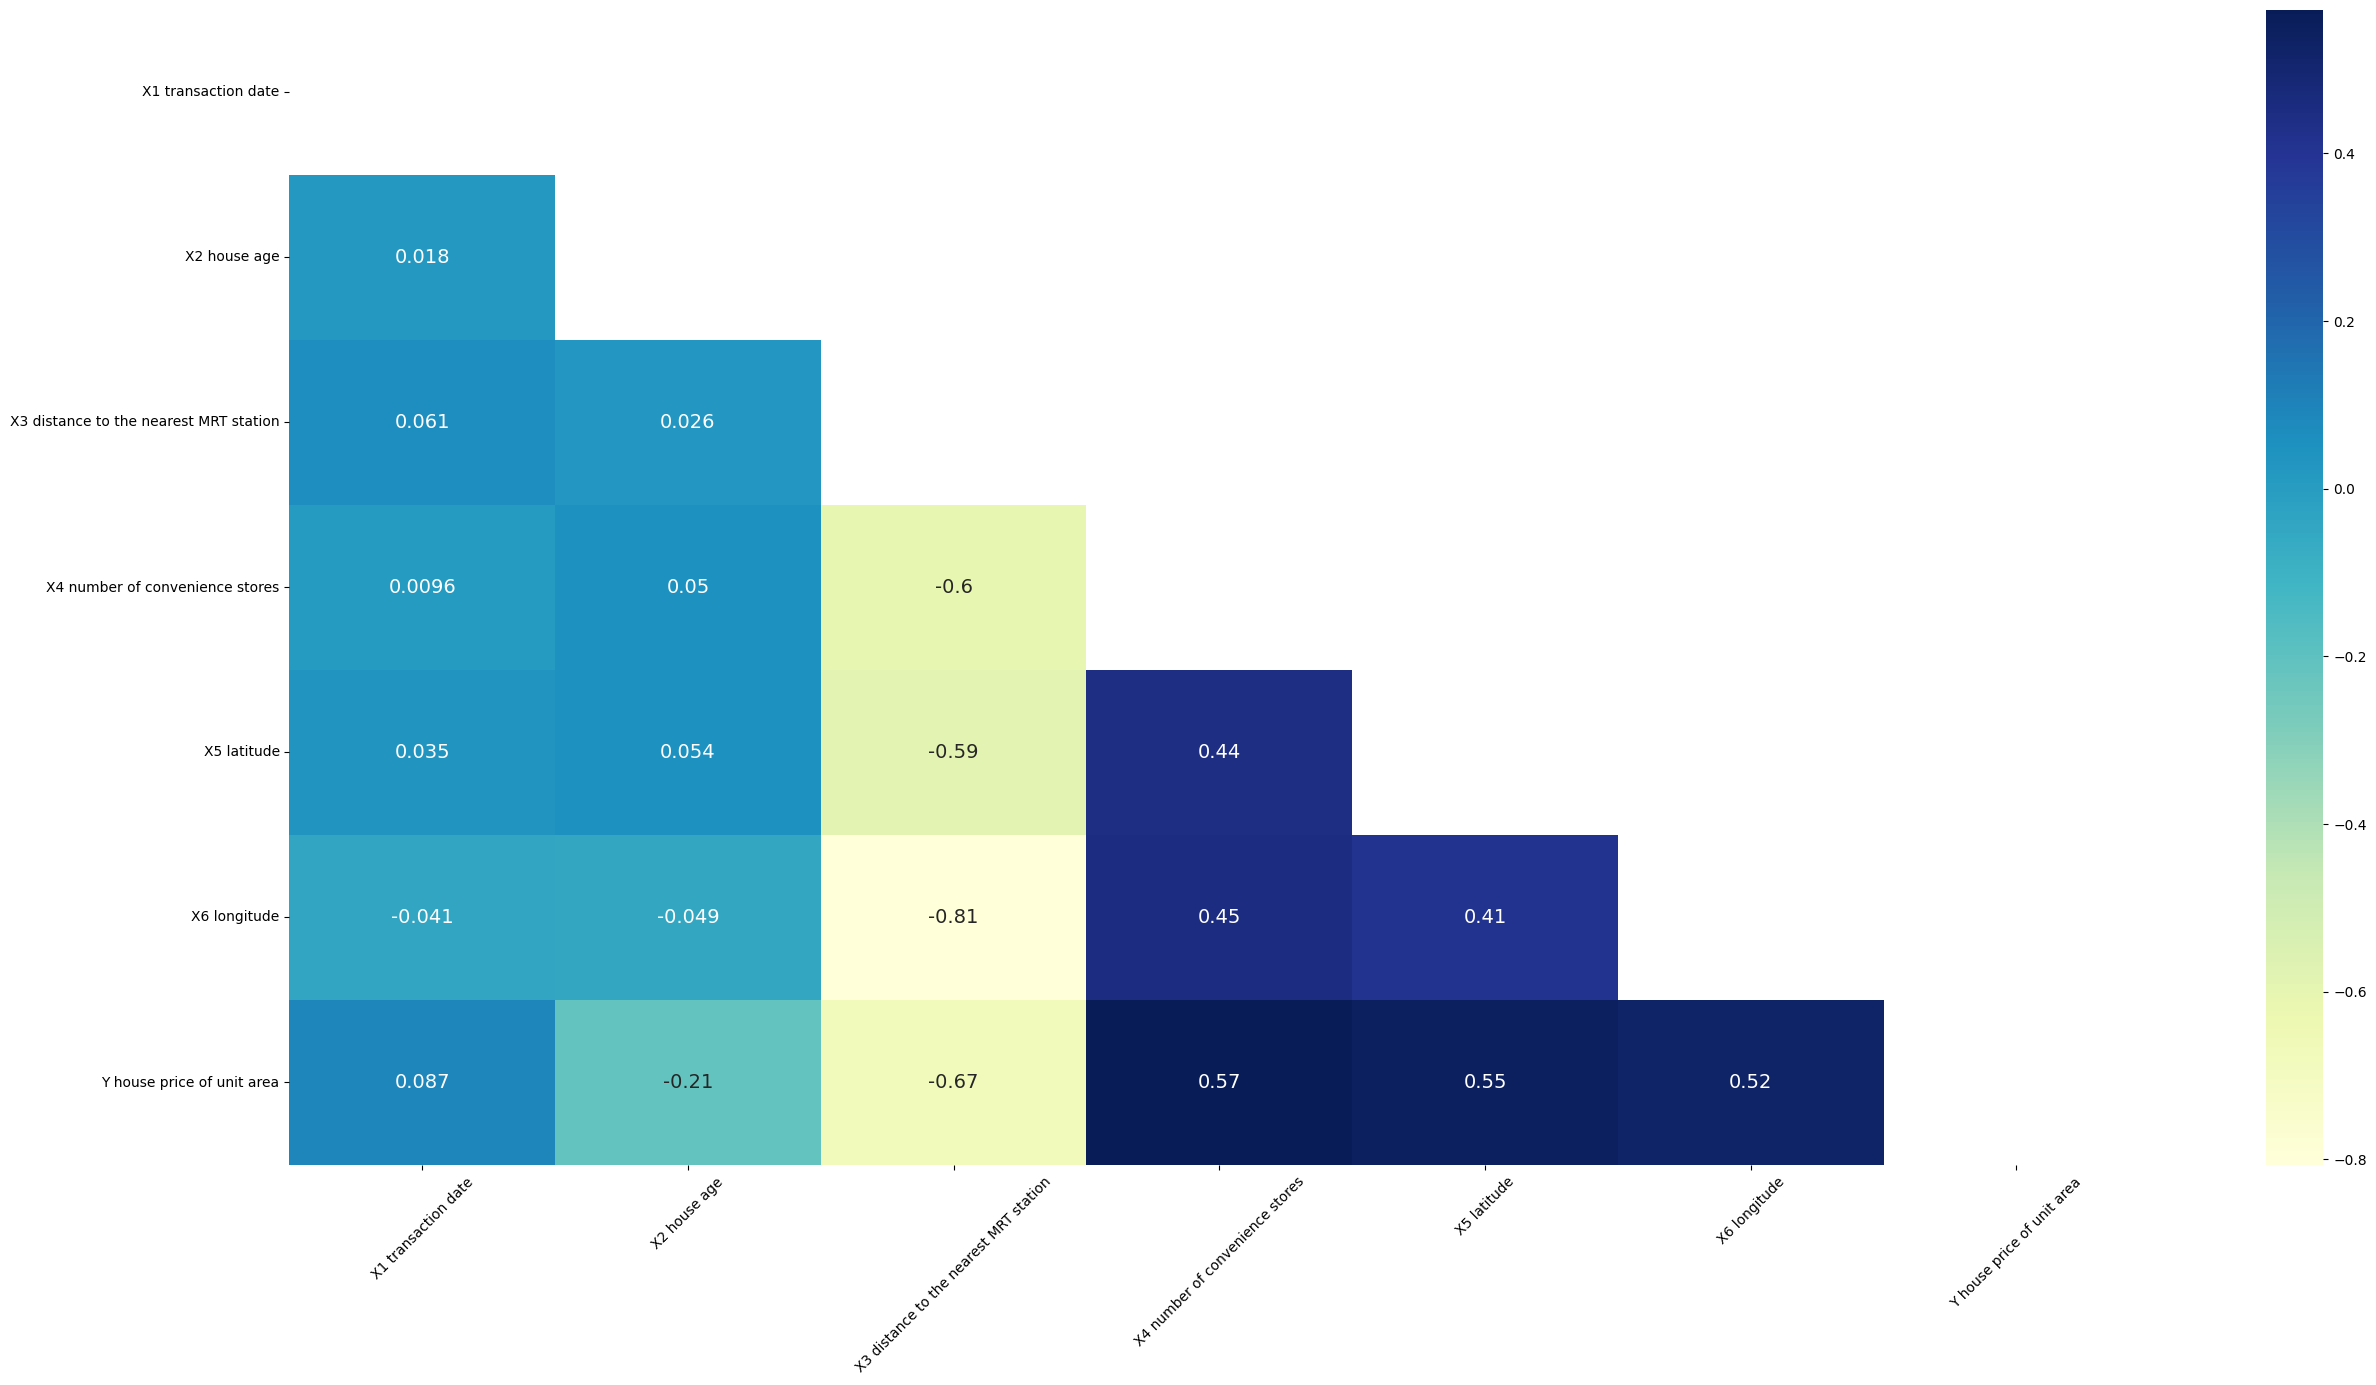

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(30, 15))
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, annot_kws={"fontsize":14}, mask=mask)
plt.xticks(rotation=45)
plt.show()

In [ ]:
corr_with_price = corr_matrix['Y house price of unit area'].sort_values(ascending=False, key = lambda x: abs(x)).to_frame()
corr_with_price.drop('Y house price of unit area')

,Y house price of unit area
X3 distance to the nearest MRT station,-0.673613
X4 number of convenience stores,0.571005
X5 latitude,0.546307
X6 longitude,0.523287
X2 house age,-0.210567
X1 transaction date,0.087491


In [ ]:
top_features = corr_with_price[abs(corr_with_price['Y house price of unit area']) > 0.1].index.tolist()
# df = df.rename(columns={'Y house price of unit area': 'house_price'})
X = df[top_features].drop(columns = ['Y house price of unit area'])
y = df['Y house price of unit area']

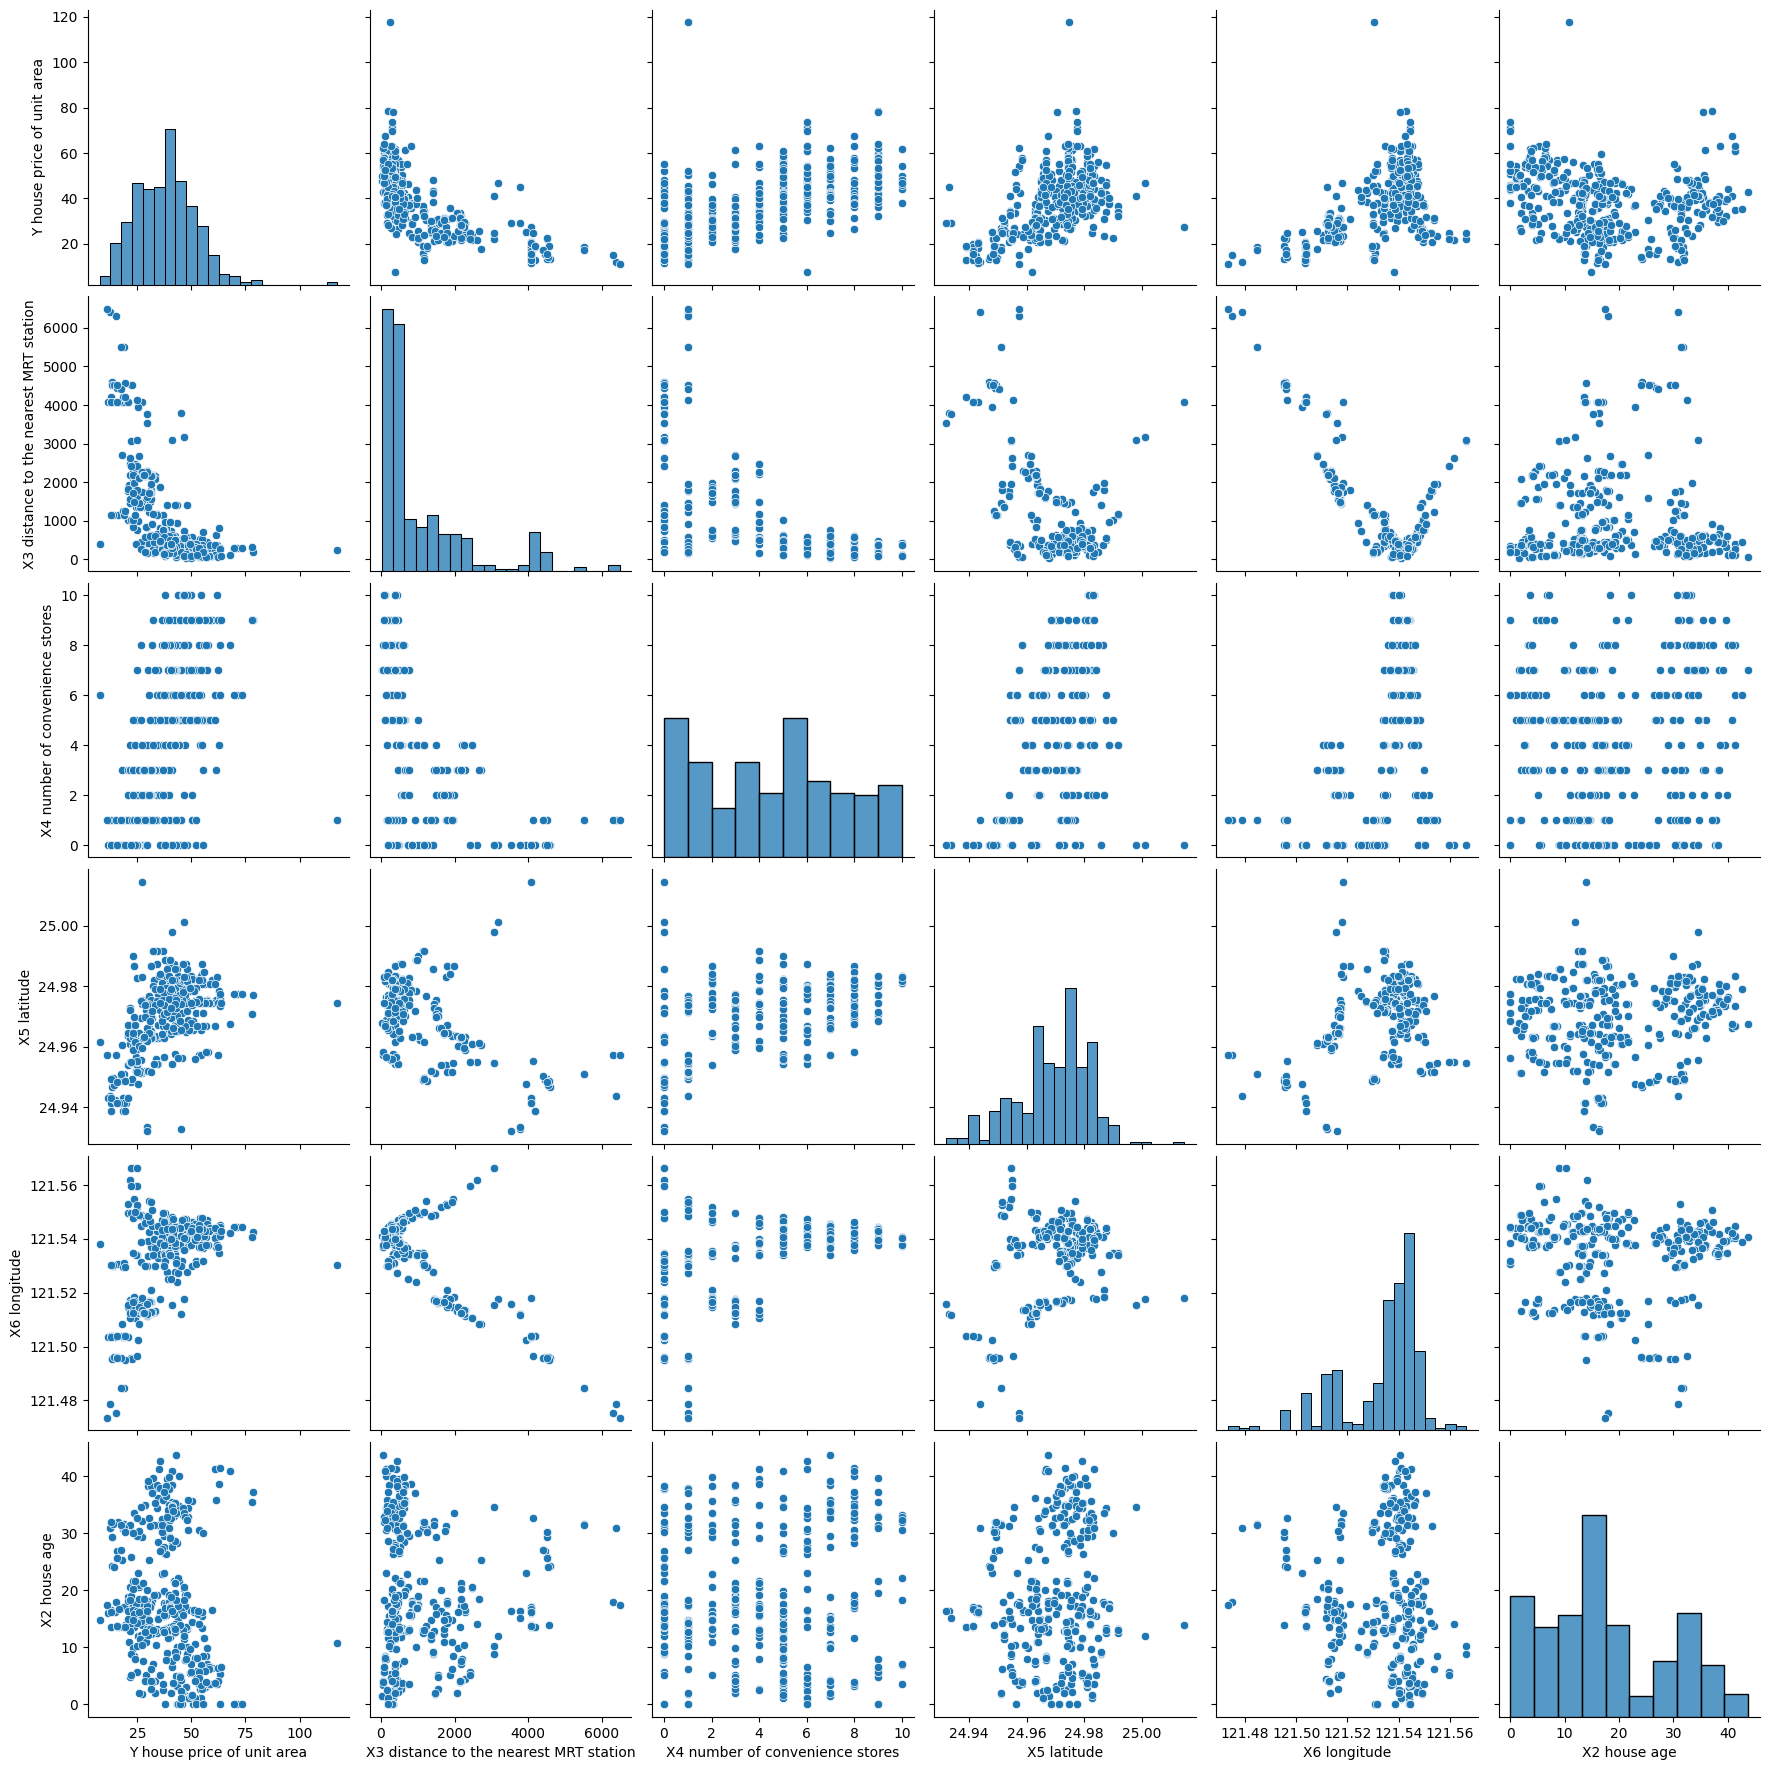

In [ ]:
sns.pairplot(data = df[top_features],height=3)

The distributions are assymetric and have many outlayers, so let's use RobustScaler

In [ ]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42,shuffle=False)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse_lr}")

Mean Squared Error (MSE): 69.07541025187201


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred)
print(f"Random Forest MSE: {mse_rf}")

Random Forest MSE: 48.87464355021523


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.09,random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Gradient Boosting MSE: {mse_gb}")

Gradient Boosting MSE: 56.27607853535443


In [ ]:
print(
    "Linear Regression MSE:", mse_lr,
    "\nRandom Forest MSE:", mse_rf,
    "\nGradient Boosting MSE:", mse_gb
)

Linear Regression MSE: 69.07541025187201 
Random Forest MSE: 48.87464355021523 
Gradient Boosting MSE: 56.27607853535443


So, the most effective model for this task is Random Forest